# Reproduce Figure 3
The figures show the fraction of positive links between pairs of nodes as a function of their number of common neighbors. The values are compared to the randomized graphs.

## Imports
Import data handling and plotting libraries.

In [27]:
from collections import defaultdict

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

from utils import read_network, DATASET_EPINIONS, DATASET_SLASHDOT, DATASET_WIKIPEDIA


Define the datasets that will be loaded and import them

In [28]:
CHOICE_DATASETS = [DATASET_EPINIONS, DATASET_SLASHDOT, DATASET_WIKIPEDIA]


In [29]:
networks_real = [read_network(
        name=name_dataset,
        shuffled=False
    ) for name_dataset in CHOICE_DATASETS]

networks_shuffled = [read_network(
        name=name_dataset,
        shuffled=True
    ) for name_dataset in CHOICE_DATASETS]

## Embededness
Iterate over each edge in a given network, find the embededness of the pair based on the number of common friends and count if the given edge is positive or not.

In [30]:
def compute_embededness(network: nx.DiGraph) -> np.ndarray:
    cn_links = defaultdict(list) # Counts positive links over number of common neighbors
    for u,v,data in network.edges.data(): # Iterate over all edges
        neigh_u = set(network.neighbors(u))
        neigh_v = set(network.neighbors(v))
        n_cmn_neigh = len(neigh_u.intersection(neigh_v))
        cn_links[n_cmn_neigh].append(data["sign"] == 1)

    # F.e. common neighbors count: collect the count, number of total links, mean and std of positive links
    results = np.array([[n_cmn_neigh, len(signs), np.mean(signs), np.std(signs)]\
        for n_cmn_neigh, signs in cn_links.items()])
    # Sort by common neighbors counts
    idx_sort = np.argsort(results[:,0])
    # Transpose s.t. it's easy to unpack the arrays
    return results[idx_sort].T


Collect embededness for all datasets as well as their shuffled counterparts.

In [31]:
embeddings_real = [
    compute_embededness(network_real) for network_real in networks_real
]

In [32]:
embeddings_shuffle = [
    compute_embededness(network_shuffle) for network_shuffle in networks_shuffled
]

## Plotting
For each dataset, plot the embededness of the dataset and its shuffled version. The error is given by `s / sqrt(n)` with `s` being the standard deviation of positive links and `n` the number of total links for that number of common neighbors.

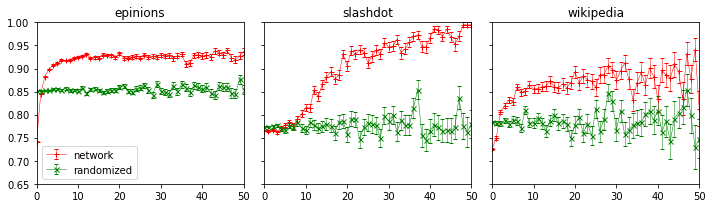

In [33]:
fig, ax = plt.subplots(ncols=len(CHOICE_DATASETS), figsize=(10, 3), sharex=True, sharey=True)

for i, (embed_real, embed_shuffle) in enumerate(zip(embeddings_real, embeddings_shuffle)):
    n_cmn_neigh_real, n_links_real, means_real, std_real = embed_real
    ax[i].errorbar(
        x=n_cmn_neigh_real,
        y=means_real,
        yerr=std_real/np.sqrt(n_links_real),
        marker="+",
        linewidth=.5,
        markersize=5,
        capsize=2,
        color="red",
        label="network"
    )

    n_cmn_neigh_shfl, n_links_shfl, means_shfl, std_shfl = embed_shuffle
    ax[i].errorbar(
        x=n_cmn_neigh_shfl,
        y=means_shfl,
        yerr=std_shfl/np.sqrt(n_links_shfl),
        marker="x",
        linewidth=.5,
        markersize=5,
        capsize=2,
        color="green",
        label="randomized"
    )

    ax[i].set_xlim(0,50)
    ax[i].set_ylim(0.65, 1.)
    ax[i].set_title(CHOICE_DATASETS[i])
ax[0].legend()
fig.tight_layout()